In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import wmfdata as wmf

You can find the source for `wmfdata` at https://github.com/neilpquinn/wmfdata


In [2]:
%matplotlib inline

mpl.rcParams["font.size"] = 16
mpl.rcParams["figure.figsize"] = (14, 7)
mpl.rcParams["axes.grid"] = True

def M_str(x, pos):
    n = int(round(x / 1000000))
    return "{n} M".format(n=n)

pct_fmt = mpl.ticker.PercentFormatter(xmax=1)
M_fmt = mpl.ticker.FuncFormatter(M_str)
comma_fmt = mpl.ticker.StrMethodFormatter("{x:,.0f}")

In [3]:
m = pd.read_csv(
    "../metrics/metrics.tsv", 
    sep="\t",
    parse_dates=["month"]
).set_index("month")

## Non-Wikidata content pages

In [5]:
m["non-Wikidata_content"] = m["total_content"] - m["wikidata_entities"]

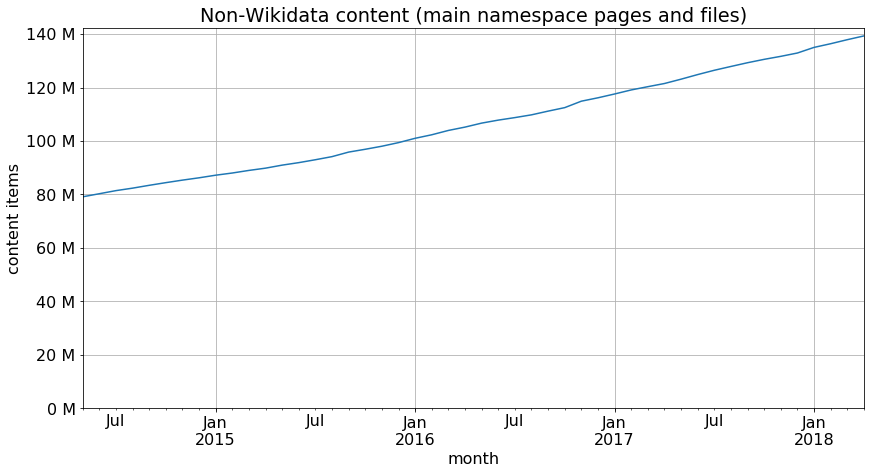

In [11]:
m["non-Wikidata_content"]["2014-05-01":].plot(ylim=0)

plt.title("Non-Wikidata content (main namespace pages and files)")
plt.ylabel("content items")
plt.gca().yaxis.set_major_formatter(M_fmt)

plt.ylim(ymin=0)
plt.autoscale(enable=True, axis="x", tight=True)